In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2019
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Machine Learning Algorithms & Evaluation"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, XX.X.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung

<div class="task_description">
    <i class="task">Task 8.1:</i> <br>
</div>

Machen Sie sich mit dem Datensatz Iris (iris.csv) vertraut. (*Familiarize yourself with the Iris record (iris.csv).*)


a) Wie viele verschiedene class labels gibt es und wie finden sie sich im Datensatz wieder? (*How many different class labels are there and how can they be found in the dataset?*)

<strong style="color: blue">Lösung:</strong>

3 (setosa, versicolor, verginica = 0,1,2)

b) Welche Features gibt es und welche Datenart haben sie? (*What features are there and what type of data do they have?*)

<strong style="color: blue">Lösung:</strong>

4 Features, petal length, petal width, sepal length, sepal width, Zentimeter

c) Schauen Sie sich die Plots an. Welche Klasse ist am einfachsten zu differenzieren? (*Look at the plots. Which class is easiest to differentiate?*)

<strong style="color: blue">Lösung:</strong>

setosa

d) Lassen Sie sich lineare Regressions Modelle für gepaarte Features anzeigen. Wie schätzen Sie die Güte dieser Methode ein? Für welche zwei Features passt es am besten und wie würden Sie das semantisch interpretieren?<br>
*View linear regression models for paired features. How do you rate the quality of this method? For which two features does it best fit and how would you interpret it semantically?*

<strong style="color: blue">Lösung:</strong>

* sns.pairplot(iris_sns, kind="reg")
* eher schlecht
* petal_length, petal_width, Blütenbreite und -länge hängen zusammen, z.B. Breite 2 Länge 6

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
['setosa', 'versicolor', 'virginica']


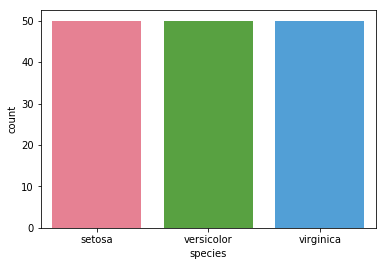

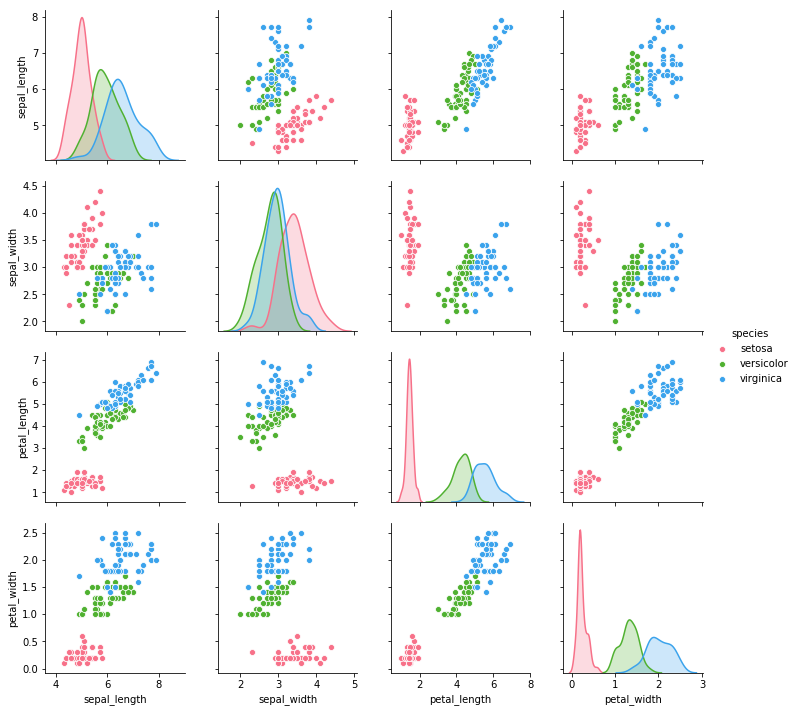

In [2]:
from sklearn.datasets import load_iris
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

iris_skl = load_iris() # load the iris dataset
iris_sns = sns.load_dataset("iris")

# show the class distribution
%matplotlib inline 
print(iris_sns.head())
print(list(iris_skl.target_names))

sns.countplot(x="species", data = iris_sns, palette="husl")

sns.pairplot(iris_sns, hue="species", palette="husl")

<div class="task_description">
    <i class="task">Task 8.2:</i> <br>
</div>

a) Lassen Sie sich den Baum (ohne Tiefenbegrenzung) ausgeben. Was fällt Ihnen auf? An welchen Stellen sind weitere Knoten nicht sinnvoll und wie könnte man das beheben?

*Have the tree (without depth limit) output to you. What do you notice? At which points are further knots not useful and how could this be corrected?*

<strong style="color: blue">Lösung:</strong>

Es bleiben nur noch wenige Instanzen in einzelnen Klassen bei einigen Knoten übrig, Baum sollte gekürzt werden

b) Schauen Sie sich folgenden Code Zeilen an. Gini Index und Entropy bewerten jeweils die Knoten und können beim Decision Tree angewendet werden. Was wäre hier unvorteilhafter? Vergleichen Sie beim Digit Datensatz.

*Look at the following code lines. Gini Index and Entropy both evaluate the nodes and can be applied to the decision tree. What would be more unfavorable? Compare in the digit data set.*

In [5]:
# gini_score = 1 - sum([i**2 for i in values])
# entropy_score = sum([-i*log(i,2) for i in values])

<strong style="color: blue">Lösung:</strong>

Wegen des Logarithmus dauert die Berechnung der Entropie auf größeren Datensätzen länger als die Berechnung des Gini-Score.

In [9]:
import time
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# digits to see difference in gini vs entropy
# dig = load_digits()
# X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(iris_skl.data, iris_skl.target, test_size=0.33)

t0 = time.process_time()
classifier = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)
classifier = classifier.fit(X_train, y_train)
t1 = time.process_time()
time1 = t1-t0
print("Time needed with", classifier.criterion, ":", time1)
classifier2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
classifier2 = classifier2.fit(X_train, y_train)
t2 = time.process_time()
time2 = t2-t1
print("Time needed with", classifier2.criterion, ":", time2)
if time1 < time2:
    print("Fastest method:", classifier.criterion)
elif time2 < time1:
    print("Fastest method:", classifier2.criterion)
else:
    print("Same time.")

y_pred = classifier.predict(X_test)
print("Pred: ", y_pred[0:20], ".....")
print("Orig: ", y_test[0:20], ".....")
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Time needed with gini : 0.0
Time needed with entropy : 0.015625
Fastest method: gini
Pred:  [0 0 1 0 0 0 2 2 1 2 0 0 2 0 0 0 1 1 0 1] .....
Orig:  [0 0 1 0 0 0 2 2 1 2 0 0 2 0 0 0 1 1 0 1] .....
0.96
[[22  0  0]
 [ 0 13  0]
 [ 0  2 13]]


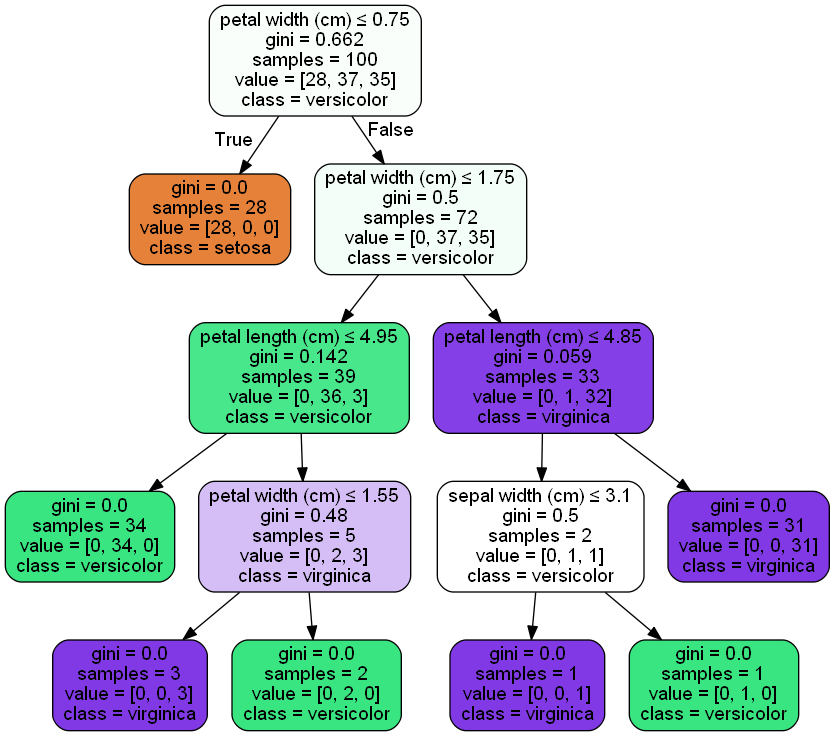

In [11]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display

# Export as dot file
export_graphviz(classifier, out_file='tree.dot',
                feature_names=iris_skl.feature_names,
                class_names=iris_skl.target_names, 
                filled=True, rounded=True,
                special_characters=True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'], shell=True)

# Display in jupyter notebook
display(Image(filename = 'tree.png'))

<div class="task_description">
    <i class="task">Task 8.3:</i> <br>
</div>

Schauen Sie sich den unten gegebenen Code an.(*Take a look at the code below.*)



a) Vergleichen Sie die einzelnen Classifier anhand der Plots, woran würden Sie die Qualität fest machen? Wie würden Sie die Laufzeit gewichten?


*Compare the individual classifiers on the basis of the plots, how would you determine the quality? How would you weight the runtime?*

<strong style="color: blue">Lösung:</strong>

Accuracy und Laufzeit, Laufzeit hier gering, was wäre bei mehr Daten?


b) Schauen Sie sich die Plots an. Warum ist die Accuracy bei den Trainingsdaten besser als bei den Testdaten?


*Take a look at the plots. Why is Accuracy better for the training data than for the test data?*

<strong style="color: blue">Lösung:</strong>

Testdaten unbekannt, Trainingsdaten bekannt


c) Schauen Sie sich die Parameter beim SVC an und ändern Sie die Werte. Handelt es sich um einen hard margin oder soft margin und was halten Sie für besser?


*Have a look at the parameters of the SVC and change the values. Is it a hard margin or soft margin and what do you think is better?*

<strong style="color: blue">Lösung:</strong>
    
soft wäre besser, bei einem Wert von z.B. 0.0001 extrem starke Verschlechterung


d) Welchen Classifier würden Sie als am schlechtesten einschätzen? Woran könnte das liegen? Binden Sie eine mögliche Verbesserungsmethode ein.


*Which classifier would you consider the worst? What could be the reason? Include a possible improvement method.*

<strong style="color: blue">Lösung:</strong>

Decision Tree, eventuell Overfitting, max_depth festlegen z.B. 10-15

e) Übliche Größen für Test Sets sind 10-20% der Daten. Ändern Sie den Code dahingehend und schauen Sie sich die Veränderungen. Woher kommen die Verbesserungen?

*Common sizes for test sets are 10-20% of the data. Change the code accordingly and look at the changes. Where do the improvements come from?*

<strong style="color: blue">Lösung:</strong>

split = int(len(data)\*0.9)

x_train, y_train = data\[:split], digits.target[:split]

x_test, y_test = data[split:], digits.target[split:]

Verbesserung, mehr Daten einbezogen, auf weniger getestet

KNeighborsClassifier
Accuracy on Training Set: 99.2205%
Accuracy on Test Set: 96.3293%
SVC
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 94.4383%
DecisionTreeClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 75.5284%
RandomForestClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 93.5484%
MLPClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 93.2147%
GaussianNB
Accuracy on Training Set: 85.8575%
Accuracy on Test Set: 80.7564%


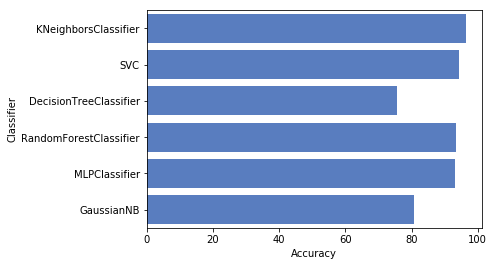

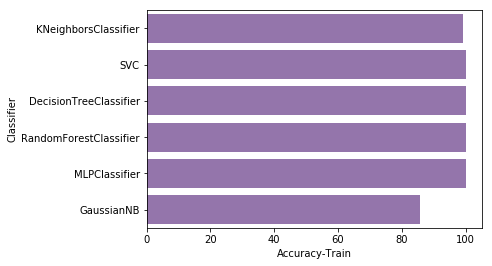

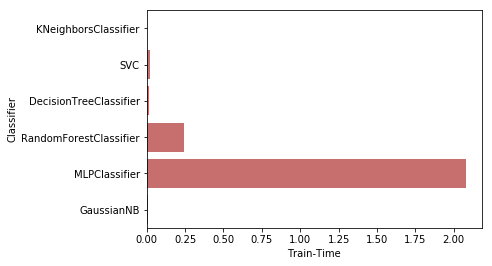

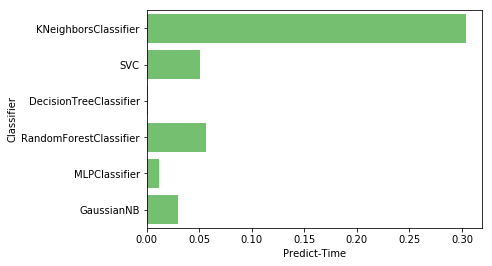

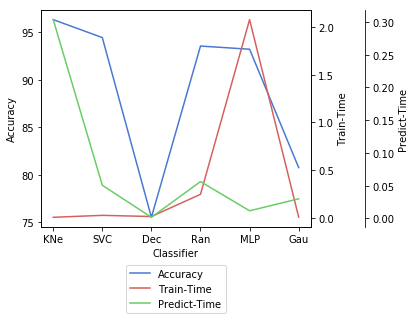

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets, svm, tree, metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

x_train, y_train = data[:n_samples // 2], digits.target[:n_samples // 2]
x_test, y_test = data[n_samples // 2:], digits.target[n_samples // 2:]

log_cols=["Classifier", "Accuracy", "Train-Time", "Predict-Time", "Accuracy-Train"]
log = pd.DataFrame(columns=log_cols)
log_short = pd.DataFrame(columns=log_cols)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    GaussianNB()]

for clf in classifiers:
    t0 = time.process_time()
    clf.fit(x_train, y_train)
    t1 = time.process_time()
    training_time = t1-t0
    
    name = clf.__class__.__name__
    name_short = clf.__class__.__name__[:3]
    
    print("="*30)
    print(name)
    
    t0 = time.process_time()
    predictions = clf.predict(x_test)
    predictions_train = clf.predict(x_train)
    t1 = time.process_time()
    predict_time = t1-t0

    acc_train = accuracy_score(y_train, predictions_train)
    print("Accuracy on Training Set: {:.4%}".format(acc_train))
    acc = accuracy_score(y_test, predictions)
    print("Accuracy on Test Set: {:.4%}".format(acc))
        
    log_entry = pd.DataFrame([[name, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log = log.append(log_entry)
    log_entry_short = pd.DataFrame([[name_short, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log_short = log_short.append(log_entry_short)
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.show()
sns.barplot(x='Accuracy-Train', y='Classifier', data=log, color="m")
plt.show()
sns.barplot(x='Train-Time', y='Classifier', data=log, color="r")
plt.show()
sns.barplot(x='Predict-Time', y='Classifier', data=log, color="g")
plt.show()


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot('Classifier', 'Accuracy', data=log_short, color="b")
p2, = par1.plot('Classifier', 'Train-Time', data=log_short, color="r")
p3, = par2.plot('Classifier', 'Predict-Time', data=log_short, color="g")

host.set_xlabel("Classifier")
host.set_ylabel("Accuracy")
par1.set_ylabel("Train-Time")
par2.set_ylabel("Predict-Time")

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc="upper center", bbox_to_anchor=(0.5, -0.15))

plt.show()

# Hausübung

<div class="task_description">
    <i class="task">Homework 8.1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>

Gehen Sie jeden der folgenden Schritte durch und berichten Sie kurz über Ihr Vorgehen:

1. Erstellen Sie einen kurzen dummy Datensatz (MeinDatensatz.csv) mit mindestens 20 Instanzen zu einem Thema Ihrer Wahl. Dieser sollte min. 2 Features und ein gold label enthalten. <br/> Falls Ihnen kein Thema einfällt können sie eins der folgenden wählen:
    * Lieblingsbücher (target: 1-5 Sternebewertung)
    * Fernsehserien (target: Genre)
    * Schmuck (target: Preis)
<br>    
*Create a short dummy record (MyDataset.csv) with at least 20 instances on a topic of your choice. This should contain at least 2 features and a gold label. <br/> If you can't think of a topic you can choose one of the following:*
<br><br>
    * *Favourite books (target: 1-5 star rating)*
    * *TV series (target: genre)*
    * *Jewellery (target: price)*
<br><br>
2. Nutzen Sie die Daten im Machine Learning Prozess. <br> Dazu gehört: Daten aufsplitten, Classifier aussuchen (Begründen Sie Ihre Wahl), Test-Daten klassifizieren. <br> <br>*Use the data in the machine learning process. <br> This includes: splitting data, selecting classifiers (justify your choice), classifying test data.* 
<br><br>
3. Evaluieren Sie die Ergebnisse. Geben Sie dafür Beispiele zu mindestens 2 von Ihnen gewählten Evaluierungsmaßen und beschreiben Sie als wie gut Sie die Ergebnisse halten und was man evtl. verbessern könnte.<br><br>*Evaluate the results. Give examples of at least 2 evaluation measures you have chosen and describe how well you think the results are and what could be improved.* <br>

__Hinweis!__ In der Abgabe müssen folgende Elemente enthalten sein:
1. Datensatz
2. Code
3. Ein kurzer Bericht über die Vorgehensweise
4. Ausgaben wie z.B. Evaluierungsmaße

*__NOTE!__ The following elements must be included in the submission:*<br>
1. *data set*
2. *code*
3. *a brief report on the approach taken*
4. *outputs such as evaluation measures*


Die Punkte 2 bis 4 sind zusammen in einem Jupyter Notebook abzugeben.<br>
*The tasks 2 to 4 are to be handed in together in a Jupyter notebook.*